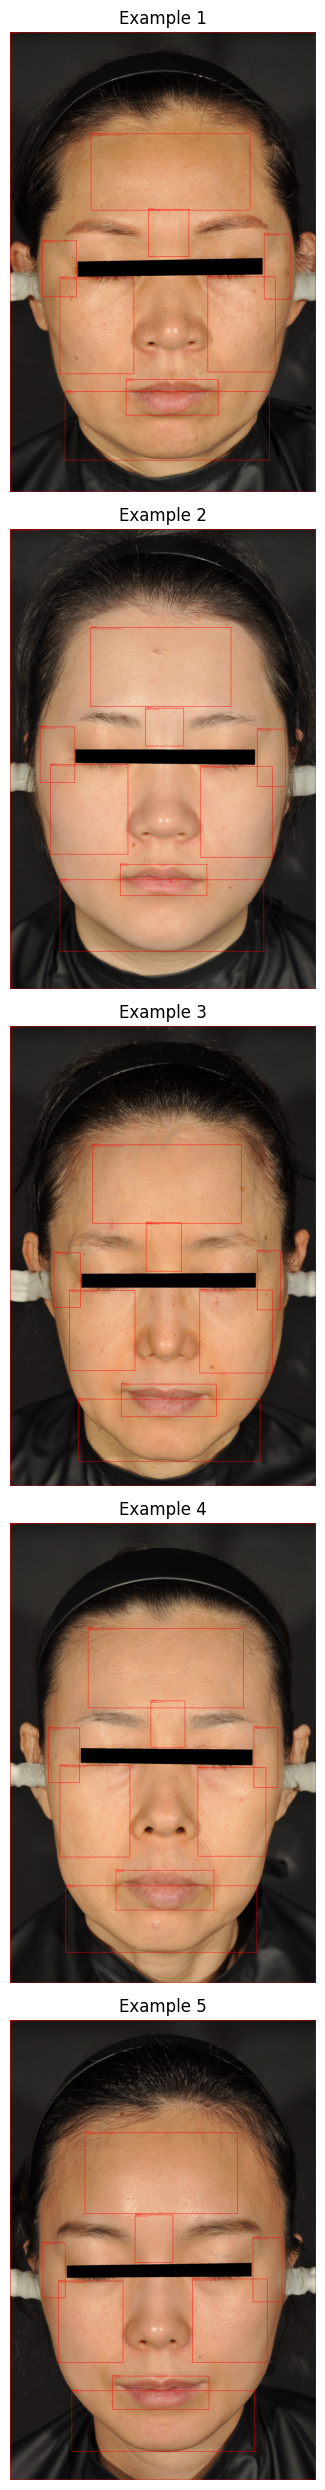

In [3]:
from PIL import Image, ImageDraw
import os
import json
import matplotlib.pyplot as plt

# Base paths for images and labels
image_base_path = r"D:\028.한국인 피부상태 측정 데이터\3.개방데이터\1.데이터\Training\01.원천데이터\TS\1. 디지털카메라"
label_base_path = r"D:\028.한국인 피부상태 측정 데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터\TL\1. 디지털카메라"

# 마지막 번호
max_number = 1100

# 매핑된 파일 경로 저장
mapped_files = []

# 숫자 반복
for i in range(1, max_number + 1):
    folder_number = f"{i:04d}"  # 4자리 숫자로 변환 (ex: 0001)
    
    # 이미지 파일 경로
    image_path = os.path.join(image_base_path, folder_number, f"{folder_number}_01_F.jpg")
    
    # 레이블 JSON 파일 경로
    label_paths = [
        os.path.join(label_base_path, folder_number, f"{folder_number}_01_F_0{j}.json")
        for j in range(9)
    ]
    
    # 파일 존재 여부 확인
    if os.path.exists(image_path):
        existing_labels = [label for label in label_paths if os.path.exists(label)]
        if existing_labels:
            mapped_files.append({
                "image": image_path,
                "labels": existing_labels
            })

# Helper function to display images with bounding boxes
def display_image_with_labels(image_path, label_paths):
    try:
        # Open the image
        image = Image.open(image_path)
        draw = ImageDraw.Draw(image)
        
        # Process each label file
        for label_path in label_paths:
            with open(label_path, 'r') as f:
                data = json.load(f)
                bbox = data["images"]["bbox"]
                facepart = data["images"].get("facepart", "N/A")
                annotations = data.get("annotations", {})

                # Draw the bounding box
                x_min, y_min, x_max, y_max = bbox[0], bbox[1], bbox[2], bbox[3]
                draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

                # Add label text
                label = f"Facepart: {facepart}\n" + ", ".join([f"{k}: {v}" for k, v in annotations.items()])
                text_position = (x_min, y_min - 10)
                draw.text(text_position, label, fill="red")

        return image
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Display first 5 examples
num_examples = 5
plt.figure(figsize=(15, 25))

for idx, mapping in enumerate(mapped_files[:num_examples]):
    img = display_image_with_labels(mapping["image"], mapping["labels"])
    if img:
        plt.subplot(num_examples, 1, idx + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Example {idx + 1}")

plt.tight_layout()
plt.show()


In [4]:
from collections import defaultdict

# 같은 부위의 bbox와 레이블을 모으기 위한 딕셔너리
grouped_data = defaultdict(lambda: {"bboxes": [], "annotations": []})

# 데이터 처리
for mapping in mapped_files:
    for label_path in mapping["labels"]:
        with open(label_path, 'r') as f:
            data = json.load(f)
            facepart = data["images"].get("facepart", "N/A")
            bbox = data["images"]["bbox"]
            annotations = data.get("annotations", {})
            
            # 같은 부위(facepart) 기준으로 bbox와 레이블 저장
            grouped_data[facepart]["bboxes"].append(bbox)
            grouped_data[facepart]["annotations"].append(annotations)

# 결과 출력 예제
for facepart, details in grouped_data.items():
    print(f"Facepart: {facepart}")
    print(f"Bboxes: {details['bboxes']}")
    print(f"Annotations: {details['annotations']}")
    print("-" * 40)

Facepart: 0
Bboxes: [[0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216], [0, 0, 2136, 3216],